In [5]:
# !pip install sklearn
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import load_breast_cancer

2.3.0


In [6]:
data_x,data_y = load_breast_cancer(return_X_y=True)
print(data_x[0].shape)
print(data_y.shape)
# print(data_y)

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)
res=[]

(30,)
(569,)


In [7]:
model = tf.keras.Sequential(name='nn_LogisticRegression')
# model.add(layers.Dense(5,input_dim=30,activation='linear'))
model.add(layers.Dense(2, activation='linear',
#  kernel_regularizer=regularizers.l2(0.001),
 input_shape=(30,)))
model.add(layers.Dense(1))
#  kernel_regularizer=regularizers.l2(0.001)))
model.compile(optimizer='adam',
 loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy','binary_accuracy'])
model.summary()

Model: "nn_LogisticRegression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 62        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [8]:
time=0
for train_index,test_index in rskf.split(data_x,data_y):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]

    # x_train=data_x[:-20]
    # x_test=data_x[-20:]

    # y_train=data_y[:-20]
    # y_test=data_y[-20:]
    time=time+1
    print('time:',time)
    history = model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)
    # model.evaluate(x_test,y_test,verbose=2)
    res.append(history)

time: 1
Epoch 1/10
512/512 [==============================] - 0s 916us/step - loss: 133.2377 - accuracy: 0.4355 - binary_accuracy: 0.4355
Epoch 2/10
512/512 [==============================] - 0s 934us/step - loss: 13.7808 - accuracy: 0.3242 - binary_accuracy: 0.3242
Epoch 3/10
512/512 [==============================] - 0s 905us/step - loss: 6.7648 - accuracy: 0.5488 - binary_accuracy: 0.5488
Epoch 4/10
512/512 [==============================] - 0s 929us/step - loss: 4.1721 - accuracy: 0.6797 - binary_accuracy: 0.6797
Epoch 5/10
512/512 [==============================] - 0s 918us/step - loss: 2.9734 - accuracy: 0.7637 - binary_accuracy: 0.7637
Epoch 6/10
512/512 [==============================] - 1s 995us/step - loss: 2.6547 - accuracy: 0.7559 - binary_accuracy: 0.7559
Epoch 7/10
512/512 [==============================] - 0s 922us/step - loss: 2.2377 - accuracy: 0.8047 - binary_accuracy: 0.8047
Epoch 8/10
512/512 [==============================] - 0s 934us/step - loss: 1.6892 - accuracy

In [9]:
# np.array(i.history['loss'])

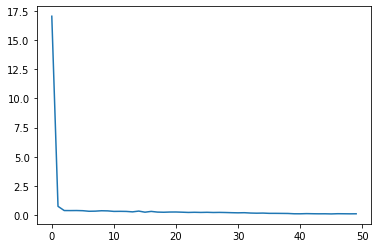

In [10]:
tmp=res
loss=np.array([])
acc=np.array([])
for i in tmp:
    loss=np.append(loss,np.array(i.history['loss']).mean())

# a=tmp.mean(axis=1)
plt.plot(loss)



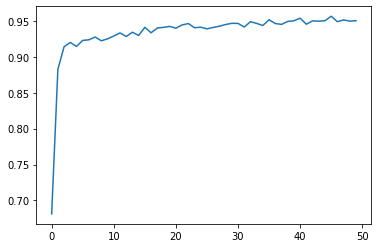

In [11]:
for i in tmp:
    acc=np.append(acc,np.array(i.history['accuracy']).mean())
plt.plot(acc)

In [12]:
# print(history.history.keys())
# print(history.history['loss'])
# print(history.history['accuracy'])
# print(history.history['binary_accuracy'])


In [13]:
# plt.plot(history.history['accuracy'])

In [14]:
# plt.plot(history.history['binary_accuracy'])


In [15]:
# plt.plot(history.history['loss'])